# Introduction to DataRobotX

## Overview

DataRobotX (DRX) is a collection of DataRobot extensions designed to enhance your data science experience. It has clean, scikit-learn-like syntax that makes training models, deploying models, and getting predictions from models easy. It supports any project type including multiclass, time series, multilabel, clustering, and anomaly detction. It also has some perks that included see in this accelerator. 

- Access the [DataRobotX documentation](https://drx.datarobot.com/index.html).

## Setup

### Install and import libraries

To get started with the package, install it using the follwing command:

   > pip install datarobotx
   
Note that DRX requires Python version >= 3.7.

In [1]:
%%bash
pip install datarobotx -q

### Import Lending Club Dataset

In [2]:
import datarobotx as drx
import pandas as pd

# Get a dataset
df = pd.read_csv(
    "https://s3.amazonaws.com/datarobot_public_datasets/10K_2007_to_2011_Lending_Club_Loans_v2_mod_80.csv"
)
# Split the dataframe into two: 80, 20 split
train = df[:800]
score = df[800:1000]

## Train a model

Fitting a model in `drx` is easy. Behind the scenes, it does exactly what you would expect it to do in DataRobot. When you call `model.fit`, it will create a project, upload the data, and train models. 

Drx makes it easy to configure projects. Drx doesn't just throw a thousand options at you from the beginning. It lets the user navigate their way to logical configurations for a project.

DRConfig() Reference: [link](https://drx.datarobot.com/reference/_autosummary/datarobotx.DRConfig.html?highlight=drconfig#datarobotx.DRConfig\n)

In [3]:
# Set a model
model = drx.AutoMLModel(name="Lending Club")

# Optional configurations
config = model.get_params()
config.Metadata.worker_count = 8
model.set_params(**config)

# Fit the models and set the target
model.fit(
    train, target="is_bad"
)  ## Note: Some Drx output is not fully supported in DR notebooks yet.

VBox()

VBox()

VBox()

VBox()

## Evaluate the model
    
*Now that you have a champion model, you can evaluate it in a few different ways.* 

If you ran the cells rather than just read them, you might have noticed that DRX actually lets you use the _current_ champion model in order to generate predictions. This means that you do not need to wait for Autopilot to finish running. You might have also noticed that you were able to execute other snippets of code while DRX was running. DRX operates asynchronously, which means you can execute additional operations while projects run in the background. You can also have DRX wait for Autopilot to finish by setting the `wait_for_autopilot` argument to true.


1. Access measures of model performance and feature importance 
2. When using an external dataset, a few additional plots are available depending on the target type
3. Evaluate the model using external libraries 

In [4]:
from datarobotx import evaluate
from sklearn.metrics import confusion_matrix

# 'score' is the testing dataset
evaluate(model, evaluation_data=score, wait_for_autopilot=True)

pd.DataFrame(confusion_matrix(score["is_bad"], model.predict(score)))

VBox()

VBox()

VBox()

VBox()

VBox()

,0,1
0,180,0
1,20,0


## Get predictions

To get predictions, call `model.predict`. Behind the scenes, it uploads data to the champion model and gets predictions.

`model.predict_proba` will give probabilities for the likelihood of the instance being of each class.

In this case, class 1 means the loan is bad, and class 0 means the loan is not bad.

In [5]:
# Make predictions with probabilities of each class (0 or 1)
preds = model.predict_proba(score)
preds

VBox()

,class_1.0,class_0.0
0,0.107910,0.892090
1,0.201492,0.798508
2,0.181867,0.818133
3,0.093362,0.906638
4,0.113582,0.886418
...,...,...
195,0.084090,0.915910
196,0.078111,0.921889
197,0.133623,0.866377
198,0.118998,0.881002


### Deploy a model

In [6]:
deployment = model.deploy(wait_for_autopilot=True)

VBox()

VBox()

### Share a model or deployment

~simple~

In [7]:
# model.share("user.name@datarobot.com")
# deployment.share(["user.name@datarobot.com", "user.name2@datarobot.com"])

### Make predictions with a deployed model

Now that the model is deployed, you can take advantage of all of the infrastructure present in a DataRobot deployment for monitoring and scaling predictions. Getting predictions takes about as much effort at deployment time as it did in training time except it's faster. It's also easy to get prediction explanations.

In [8]:
superior_predictions = deployment.predict_proba(score, max_explanations=5)
superior_predictions

VBox()

VBox()

,class_1,class_0,explanation_1_feature_name,explanation_1_strength,explanation_1_actual_value,explanation_1_qualitative_strength,explanation_2_feature_name,explanation_2_strength,explanation_2_actual_value,explanation_2_qualitative_strength,...,explanation_3_actual_value,explanation_3_qualitative_strength,explanation_4_feature_name,explanation_4_strength,explanation_4_actual_value,explanation_4_qualitative_strength,explanation_5_feature_name,explanation_5_strength,explanation_5_actual_value,explanation_5_qualitative_strength
0,0.107910,0.892090,revol_util,-0.192621,25.2,---,annual_inc,0.174761,23000.0,+++,...,MI,--,mths_since_last_delinq,-0.074489,NaN,--,title,0.053737,Snowmobile,++
1,0.201492,0.798508,revol_util,0.426575,100.0,+++,annual_inc,0.158384,27000.0,++,...,small_business,++,mths_since_last_delinq,0.113900,10.0,++,addr_state,-0.109507,WA,--
2,0.181867,0.818133,revol_util,0.414158,98.5,+++,annual_inc,0.187027,20004.0,++,...,FL,--,mths_since_last_delinq,-0.074489,NaN,--,title,0.053737,a/c repair loan,++
3,0.093362,0.906638,revol_util,-0.357354,5.3,---,earliest_cr_line (Day of Week),0.113903,6,++,...,21.0,++,addr_state,-0.109507,CO,--,earliest_cr_line (Month),-0.078358,10,--
4,0.113582,0.886418,addr_state,-0.109507,VA,--,revol_util,0.102904,60.9,++,...,45000.0,++,title,-0.076155,Debt Consolidation Loan,--,mths_since_last_delinq,-0.074489,NaN,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.084090,0.915910,revol_util,-0.356526,5.4,---,addr_state,0.255516,CA,+++,...,92000.0,--,earliest_cr_line (Month),-0.078358,10,--,mths_since_last_delinq,-0.074489,NaN,--
196,0.078111,0.921889,revol_util,-0.229044,20.8,---,addr_state,-0.109507,NY,--,...,NaN,--,annual_inc,0.056031,52000.0,++,title,0.053737,Casinobill,++
197,0.133623,0.866377,revol_util,0.368629,93.0,+++,addr_state,-0.109507,AZ,--,...,40000.0,++,earliest_cr_line (Month),-0.078358,10,--,mths_since_last_delinq,-0.074489,NaN,--
198,0.118998,0.881002,revol_util,-0.225733,21.2,---,annual_inc,0.150376,28956.0,++,...,16.0,++,addr_state,-0.109507,TX,--,verification_status,0.053103,VERIFIED - income source,++


Use the following cell to organize the display of the prediction explanations, similar to [tidy](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

<Axes: title={'center': 'Average Feature Strength'}, ylabel='feature_name'>

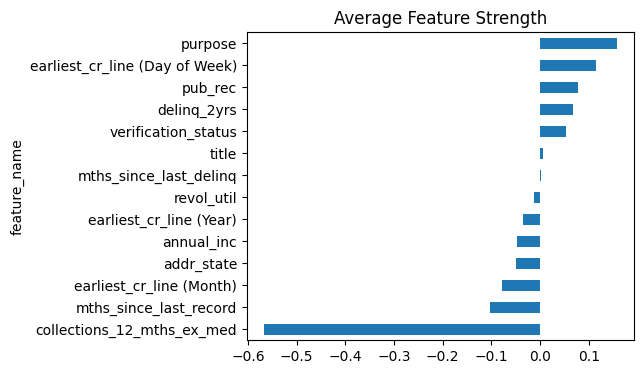

In [9]:
# Make explanations long form
melted_predictions = drx.melt_explanations(superior_predictions, id_vars=["class_1", "class_0"])


# Make a plot
(
    melted_predictions.groupby("feature_name")["strength"]
    .mean()
    .sort_values()
    .plot.barh(figsize=(5, 4), title="Average Feature Strength")
)

## Advanced usage

You might wonder what else you can do with DRX:

- Easy project configuration
- Convert to a DataRobot SDK project
- Extend DataRobot functionality (i.e. DataRobot projects with some extra enhancements)
  - FIRE (See [drx.ColumnReduceModel](https://crispy-fiesta-5a44cb93.pages.github.io/model/column_reducer.html))
  - Self-Join Feature Discovery (See [drx.SelfDiscoveryModel](https://crispy-fiesta-5a44cb93.pages.github.io/model/self_join.html))

### Convert to a DataRobot SDK project

Convert your new specially configured drx project into a DataRobot SDK Project:

DataRobot is not going to be able to do everything that DataRobot can do and it isn't meant to. That's why DataRobot has made it easy to convert a `drx` project to a DataRobot SDK project. This way, you can use the DataRobot SDK to do things that `drx` doesn't support yet.

In [10]:
sdk_project = model.dr_project

top_models = sdk_project.get_models()[:5]
top_models

[Model('Generalized Additive2 Model'),
 Model('RandomForest Classifier (Gini)'),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance)'),
 Model('Elastic-Net Classifier (mixing alpha=0.5 / Binomial Deviance)'),
 Model('Elastic-Net Classifier (L2 / Binomial Deviance)')]

### Basic DataRobot package functionality

(0.0, 1.0)

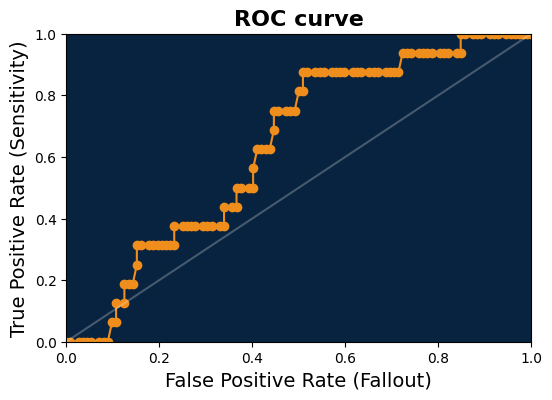

In [11]:
import matplotlib.pyplot as plt

roc = top_models[0].get_roc_curve("validation")
df_roc = pd.DataFrame(roc.roc_points)

dr_dark_blue = "#08233F"
dr_roc_orange = "#EF8E1C"
white = "#ffffff"

fig = plt.figure(figsize=(6, 4))
axes = fig.add_subplot(1, 1, 1, facecolor=dr_dark_blue)

plt.scatter(df_roc.false_positive_rate, df_roc.true_positive_rate, color=dr_roc_orange)
plt.plot(df_roc.false_positive_rate, df_roc.true_positive_rate, color=dr_roc_orange)
plt.plot([0, 1], [0, 1], color=white, alpha=0.25)
plt.title("ROC curve", size=16, fontweight="bold")
plt.xlabel("False Positive Rate (Fallout)", size=14)
plt.xlim([0, 1])
plt.ylabel("True Positive Rate (Sensitivity)", size=14)
plt.ylim([0, 1])
# plt.show()

## Conclusion
What a ride. You've learned how to use the new, agile, DRX package. DRX streamlines project creation & configuration. This notebook taught you how to create a deployment using a champion model with ease. Try using DRX with your own dataset, and check out DRX's documentation if you have questions or want to explore it further